# Welcome to Google Colab!



Google Colab is a cloud-hosted ipython environment. Ipython is just like normal python, except you run code in independent cells, rather than interpreting a whole file at once. The below code snippet is one *cell* of code. 

Click on the run button on the left side of the cell (or click into the cell and press shift + enter) to run it. 

In [ ]:
#You can use the exact same syntax you use in any other python environment.
print("Hello World!")

Hello World!


Note that variables you make in one cell are available in other cells. See below for an example of what I mean. 

In [ ]:
seconds_in_a_day = 24 * 60 * 60
print(seconds_in_a_day)

86400


In [ ]:
print(seconds_in_a_day)

86400


One *really* important thing to realize is that *colab remembers the last cell you ran*. This means that your cells don't have to be executed in order! This is very powerful, but it can also lead to lots of confusion if you don't understand what's happening.

Let's look at an example. Execute the two below cells in order. 

In [ ]:
#first cell
my_string = "I was declared in the first cell"

In [ ]:
#second cell
my_string = "I was declared in the second cell"

What do you think the value in my_string is? Take a guess, then run the below cell to find out. 

In [ ]:
print(my_string)

I was declared in the first cell


If you guessed the value is "I was declared in the second cell", you would be correct! This is because, when you ran the second cell, the original value of "my_string" was overwritten.

Now, go back run the first cell. Then, print "my_string" again. You should see that it prints out "I was declared in the first cell". Even though the second cell is lower down, it was not the last thing ran, so it's value was overwritten. 

Feel free to take a moment to play around with this until you are comfortable with it. Declare your own variables and print statements in various order to explore how it works. 



# A Peek into the Hardware

**You may have noticed that the first cell you ran took longer than the rest of the cells to execute.**

That's because google colab had to connect you to a runtime. When you first press run on a new colab notebook, it has to fetch computer hardware to actually run the code on. 

Google lets you use their hardware for free to run complex and memory-intenisve machine learning code that you may not otherwise be able to run. 

If you try running the "Hello World" snippet again, you'll notice that it runs much faster this time. 

Let's take a look at what hardware google gave you to run on.

In [ ]:
!nvidia-smi

Sat Jan 28 01:10:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Did you just get the error that "NVIDIA-SMI has failed"?**

That's because google colab sometimes gives you a standard cpu runtime insted of a gpu runtime. GPU's are preferable in machine learning applications because they are better at running a lot of math operations in parallel.  

If you didn't recieve this error, you can skip to the "Intro to Linux Commands". 

Luckilly, you can change your runtime from a CPU to a GPU really easily. Click on the bar chart in the upper right hand corner. 
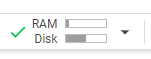

You should see a button near the bottom that says "Change runtime type".

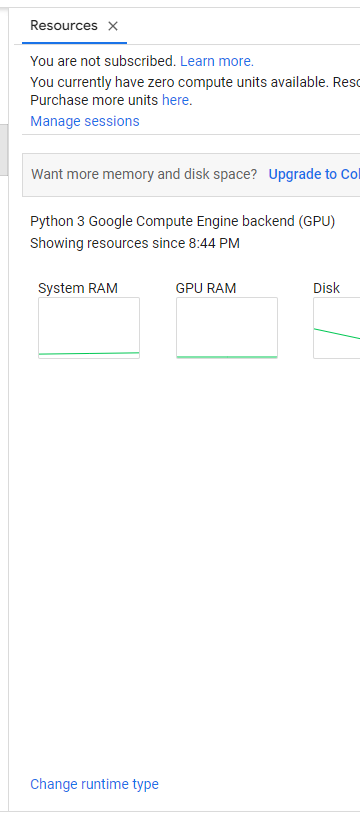

Click this, and change your hardware accelerator from "None" to "GPU".

 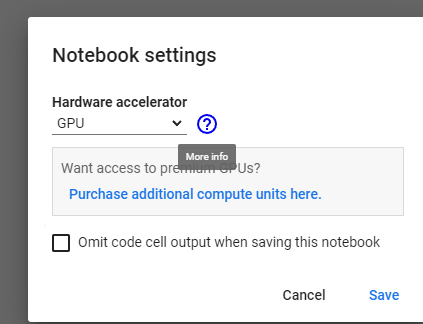
 
Then run the below line of code again. 



In [ ]:
!nvidia-smi

Sat Jan 28 01:10:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**And there you have it.**

The above code printed out the specs of the gpu that google connected you to. Any code you run in this notebook will be run on that device (at least until you disconnect from the runtime). 



# Intro to Linux Commands

Let's take a step back and look at the line of code you just ran to print that: ***!nvidia-smi***

nvidia-smi is a *linux command*. Linux is an operating system (like macOS or windows) that is commonly used for technical applications. Linux commands are typically ran in a command window (like cmd, on windows). 

If it feels weird that you ran a linux command from *inside* a python environment, that's okay. It should feel a little weird, but it's the "!" that makes it work. 

An "!" at the start of a line of code in an ipython environment is how you access the linux command window. When you use "!", it opens a new linux command window, runs your line, then closes the window. 

**It's important to note that a new window is opened and closed for each command. It does not save your changes.** To save your changes, you need to start the line with a "%" instead of "!". 

Let's explore the difference between "!" and "%" below. 



In [ ]:
!mkdir test_directory
!cd test_directory

**What did we do here?**

We first called the linux command "mkdir" to make a new directory (folder) called test_directory. Then, we called "cd" (**c**hange **d**irectory) to navigae into our new test_directory. 

If you click on the folder icon on the left side of your screen, you can look at the current filesystem you are inside.

You should see a directory called sample_data, our test_directory, and (at the top), a button to move back outside the current folder. Let's check what folder we are in using the pwd (**p**rint **w**orking **d**irectory) linux command.

In [ ]:
!pwd

/content


**Huh. We aren't in our test_directory.**

Let's check to make sure our directory exists. 

In [ ]:
!ls #list directory linux command

sample_data  test_directory


**Yep. test_directory exists. So, the issue must have been with how we called cd**

What happened? We didn't "save our changes" by calling "%", so the directory we changed into didn't become persistent. To navigate into the directory, we need to use %cd instead. 

In [ ]:
%cd test_directory

/content/test_directory


Cool. So now we know what linux commands are, how to use them, and we know there is a differenfce between ! and %. But what is the difference? What does "%" actually mean?  

## Magic Commands

Ipython has a set of very useful commands that make life with python much better. These commands are called "magic commands" and they are denoted by the "%" symbol. Magic commands are functions built into the python environment (called a kernel). So, herein lies the difference: "!" sends your command to the linux operating system environment, and "%" sends your command to the python kernel.

The reason that we have to use %cd instead of !cd is because we want *our python environment* to change directory, not our linux os environment. That's why using %cd gives the effect of "saving our changes". Python has other ways of changing the current directory, but they are more convoluted. With "%", ipython does all the work for you. 



# Mounting Google Drive

Restart your runtime. (At the top left, under the file name, click runtime, disconnect and delete runtime. Then click reconnect on the right side of the screen.)

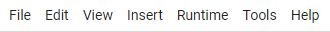

If you open the folder icon on the left side of the scren again, you'll notice that test_directory is gone. This is because your files were being saved *locally to the device google gave you*. When you disconnected, google wiped any files you saved on it to make it ready for the next person.

**This means anything you save into the colab environment directly will be deleted when you leave.**

But what if you want to save files? That's where your google drive comes in. 

If you don't have a google account (gmail, google drive, etc), create one now. Then run the below code and follow its prompts. 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now, if you check under the folder icon again, you should see a new directory, called gdrive. (If you don't see this, click the folder refresh button above where the files are listed). 

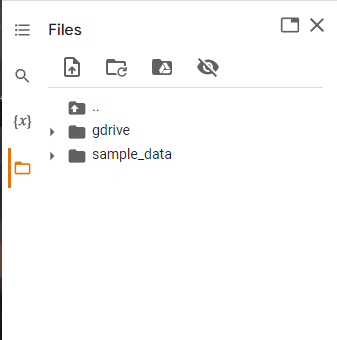

Inside gdrive, you will find *your personal google drive files*. 

**Anything you save here will be kept safe. It will not be deleted when you reload runtimes**. 

# Important Libraries

The nice thing about google colab- other than the free computer hardware- is that it comes with a lot of very useful libraries for machine learning already installed. Let's take a look at some of the most important ones now.



> **Numpy**:Numpy is a python library that handles the creation and manipulation of large datsets through the use of array-like datastructures. It is the foundation for a lot of the other libraries we are about to discuss. 

> **Matplotlib**: This is a very popular visualization and plotting tool. Pretty much any plot you see done of machine learning content is probably done through matplotlib. 

>**Scipy**: Scipy is another foundational tool with many useful functions for data analysis. It is especially useful for image processing tasks. 

>**Scikit-learn**: This library pulls together Scipy, Numpy, and Matplotlib to provide implementations for many popular classical machine learning algorithms. 

>**Pandas**: Pandas is another higher-level library that leverages scipy, numpy and matplotlib to perform data analysis and manipulation. If you are trying to inspect your dataset, pandas probably has whatever you're looking for through its DataFrame class.

>**Tensorflow and Pytorch**: Tensorflow and pytorch are the predominant, easy-to-use interfaces for machine learning. In particular, these libraries are foundational to modern deep learning, which we will be getting into later.  





Colab comes with all of these libraries pre-installed. All you have to do is import them. If you have need of a library that isn't pre-installed, try !pip install <your-library-name>. "pip" is Python's package installer. When you call it, it searches the very popular python software repository, PyPi, for the library you requested and installs it. If the library you are looking for is indexed in PyPi, pip will install everything for you. If the code you are looking to use isn't in PyPi's repository, but is on github, you can clone the repository to use it. We will cover cloning github repositories in more depth later. 

# But wait, why do we even need ML?

That's a good question, and it's one we have yet to answer. The short version is that some problems are too complex for us to solve manually. Machine learning is a way for us to search for the most optimal solution for a problem. 

Let's imagine a simple problem: Suppose that I want you to figure out a student's GPA based off their exam scores. That shouln't be too hard, right? Scores in your classes relate exactly to your GPA; there is a mathematical function that the school uses to take your scores and turn them into a GPA. Given some time (and maybe access to Google), we should be able to figure out the function that takes us from our input exam scores to our output.

Now, let's complicate the problem. Say that I want to know students' GPA, but I don't have their test scores. Instead, I only have information about their average amount of sleep per night. Does the amount of sleep you get correlate to your grades? Yes, probably. But, it isn't a hard-and-fast rule like the relationship between exam scores and GPA. The situation is more complicated. 

If I sat down and spent all day trying to come up with some formula to model this relationship, I *might* be able to come up with soomething halfway decent. Now, let's consider the situation where I have more inputs. Let's say I have average number of hours of sleep, information about parental involvement in the student's learning, what school they attend, which classes they take, if they take AP/IB classes, and how many extracurricular activities they participate in. That's *a lot* more variables to consider, and the chances that any human can sit down and come up with a function that relates all those inputs to a student's GPA with any sort of accuracy is much more slim. In situations like this, we employ machine learning.

Machine learning is used when a problem becomes too complex for us to manually solve. Instead of coming up with a function ourselves, we develop clever algorithms that can figure out an optimal function for us. 


# Now let's do something cool!

You now know the basics of colab, have a sense for why machine learning is important, and are familiar, in passing, with the most popular machine learning libraries. Now, it's time to use them. 

You have probably seen the movie *Titanic*. If you haven't seen it, you've probably heard of it. If you haven't heard of it... well... look it up I guess. The Titanic is, of course, based on the real-life shipwreck of the Titanic. In this excercise, we are going to use machine learning to predict whether passengers aboard the Titanic survived using information about their age, gender, wealth, etc (Credits to Kaggle for the dataset we are going to use). 


To begin, we need to dive a little deeper into github and *clone* a repository for our own use. 

Cloning a github repository basically just means copy all its contents to your local device. Start by running the below line. 

In [ ]:
!git clone https://github.com/cadenxh/titanic-classification

Cloning into 'titanic-classification'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 22.71 KiB | 7.57 MiB/s, done.


That line of code just sent a command to the linux environment to go to the website https://github.com/cadenxh/titanic-classification and copy all the files found there onto your local device. Feel free to click on the link and verify for yourself that everything copied over. 

Any github repository you find on the internet can be copied over to your device this way. If you are looking to contribute to a github project, or use collabortate with people, there's a good bit more you have to do to use github properly. But if you just want to use the code in a repository for your own purposes, git clone is a great, easy way to do so. 

Generally speaking, people who store things on github all include a few elements that make it easier for people unfarmiliar to their work pick up and use their code. The most important of which is the "README" file. "README" files are your instruction manual. Take a minute to read the README file you just cloned. 

## The Data

The readme directs you to a link to download the data we will be using. There should be only one file, but we are going to have to split it into three parts: train, validation, and test. **Be sure to swap out the PATH\TO\YOUR\TRAINING\DATA input for the path to the train.csv file you have**. You can simply pull up colab's file explorer, right click on your data file, and select "copy path" to get the file location.

In [ ]:
import pandas as pd

raw_data = pd.read_csv('/content/test_directory/titanic-classification/data.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's dig into what that code did. First, we imported the python module "pandas". As we talked about earlier, pandas is a module that is really good for analyzing and manipulating data. The whole "import pandas *as pd*" business is just creating an alias "pd" for the module "pandas". You are renaming pandas to be pd in your application. 

Then, we ran pd.read_csv. This function takes all the data from your file and loads it into the raw_data variable. 

Lastly, .head() is a function that acts on the data inside the raw_data variable. It just prints out the first few rows of data in a fomat that's easy to look at. 

Let's take a second to inspect the raw_data variable. 

In [ ]:
type(raw_data)

pandas.core.frame.DataFrame

The above line of code will tell you what type of object the variable raw_data is. Running the code, you will see that raw_data is a Dataframe object. Dataframes are a custom object provided by pandas that is very useful for data analysis. 

Now, if you take a closer look at the data above, you might notice some problems with it. Some columns have a categorical label (such as survived), some have a numerical value (such as age), and others have a string value (like name). Additionally, in some columns, you may have noticed a value of "NaN". The value of NaN can be returned based on different errors in the original data, one of which being missing data. When working with machine learning, these types of data have to be treated differently. Two common approaches to dealing with this are to get rid of any entry that has a NaN, or to interpolate the average value from the existing data to replace the Nan. Be careful with this dataset, because some of the columns, such as Age, do have Nans. 

Additionally, it's is usually important to think about what parts of your data is improtant before you apply any sort of machine learning algorithm. This process is called "Feature Engineering". For deep learning, this processs is not as important, as deep learning automates feature extraction. However, for any shallow learning algorithms, feature engineering is a must. 

In this application, we will skip ahead a bit. Instead of thouroughly investigating each variable and determining which ones correlate with the output most thoroughly, we will just use "Sex" and "Pclass", since, from the story of The Titanic, we know that sex and income correlate well with survival rate. 



In [ ]:
raw_data.drop(["PassengerId", "Cabin", "Embarked",
               "Name", "Age", "SibSp", "Parch", "Ticket", "Fare"], axis = 1, inplace = True)


Great, we have dropped all the rows of data that we don't want. Let's look at what we have again. 

In [ ]:
raw_data.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


I mentioned earlier that computers can't operate on strings (words) such as "male" and "female". We must assign numbers as labels (0 or 1) instead of the string label currently in the data. 

In [ ]:
import numpy as np #so we can use the "where" function.
raw_data['Sex'] = np.where(raw_data['Sex'] == 'male', 0, raw_data['Sex'])# read this like "where raw_data['Sex'] = male
#replace 'male' with 0. Otherwise, just use the value in raw_data['Sex']. 
raw_data['Sex'] = np.where(raw_data['Sex'] == 'female', 1, raw_data['Sex'])

Now, it's time to split up the data for training. 

## Training, Validating, and Testing

All machine learining tasks need a training, validation, and testing dataset. To get these, you take your raw data, and simply split it into three parts. Commonly, 80% of your raw data becomes the training datset, 10% becomes your validation set, and the last 10% becomes your testing dataset. 

The reason for the training and testing sets should be fairly intuitive. Think about what you do in school: you learn new information from your teachers, the textbook, the internet, etc. Then, you are given a final exam to see how well you learned that new information. The questions on the exam are *similar* to what you learned from, but they are not the exact same. In the same way, we need to give the algorithm data to learn from, and seperate but similar data to test itself on. 

The reason for a validation set, however, might not be as clear. Validation sets and Testing sets are really similar; they are both datasets used as an evaluation tool for your algorithm. The key difference is that testing datsets are used *at the end* of the training process as the final check that your algorithm is working like you want it to, and validation is used to check incrementally during training. To continue our school analogy, if the training datset is like the information in your textbook that you learn from, and the testing datset is like the questions on your final exam, then the validation dataset is like the quizzes during the schoolyear. Fundamentally, they are no different than the questions on the final exam, but they are *used* differently. 

You might be thinking,"Why in the world does a machine learning model have to have quizzes and a final exam? This feels weird and redundant". That's a valid criticism, because it seems like a model should be able to just learn with a test dataset "final exam". We will take an in-depth look into the function of the validation dataset in a later module, but I want to at least give a quick sneak peek into the rationale here so you aren't left befuddled. The reason we have all three datsets has to do with two keywords you will see pop up time and time again: **overfitting** and **hyperparameter tuning**. 

Overfitting basically means that your model has memorized the training dataset, but not the underlying patterns. It's like if you sat down and memorized a bunch of example problems from your math book, but never actually took the time to understand what was happening. What happens when it comes quiz time? You fail becuase you never learned how to actually do the problem, *you just memorized the examples you were given*. The same thing can happen to a machine learning model, and giving it "quizzes" along the way can help us catch when the model isn't actually learning, but is just memorizing the training dataset. When it gets to the validation dataset, we can see it fail and make adjustments. 

How do we make adjustments? That's where hyperparameter tuning comes in. Hyperparameters are variables you can change to modify the way in which a machine learning network behaves. However, it is possible to overtune the model to perform well on the validation dataset, which will again lead to overfitting. But this time, you won't be able to notice the overfitting because you have made it overfit to the validation dataset. This is where the test datset comes into play; the test dataset makes sure *you yourself* didn't cause the model to overfit.

To make an analogy, imagine that your machine learning model is a physical machine -- perhaps a racecar. Hyperparameters are the things you can tweak and tune to make your model -- your racecar -- work better. You can tweak things like engine torque, wheel size, and chassis shape to try to make the car run better on a given track. 

Let's say you are a racecar engineer. You design a car and you run simulations and such to make sure your car will work, based on data from previous cars built. This is like training your model on the training dataset. Then, you build a prototype racecar and bring it to the track and test it. After testing, you realize you could change some things to make it run better -- analysis shows that increasing engine torque would make it run better on the track because the track is really hilly. So, you go back and tweak your design to have higher torque. This is like hyperparameter tuning. You do this process for a while, tweaking the torque until you are convinced you have the best racecar possible. You ship it to production and it goes out to the world. But soon, you get complaints from customers saying that your racecar is being outran by most other racecars on all tracks that aren't hilly! Why did this happen? You overtuned you racecar design for specifically hilly tracks when it needed to perform on all types of tracks. So, when the racecar performs on anything other than its track (the track it was validated on), it performs poorly. If only we had tested on other racetracks before shipping to production! 

This is, in essence, what can happen to machine learning models when you do hyperparameter tuning. If you tune your racecar -- your ML model -- to perform really well on one track (on a validation dataset), you run the risk of making it perform poorly on real racetracks (the data you use your model on in the real world). To safeguard against this, we use a testing dataset (other racetracks) to make sure that our model can perform on similar data that we didn't specifically tune it to perform well on. 

So, now that we have covered why you need to split raw data into three sets, let's actually do it. 


In [ ]:
from sklearn.model_selection import train_test_split
train_data ,test_and_val_data = train_test_split(raw_data, test_size = .20, random_state = 2) #split into train and an aggragated test and val
val_data, test_data = train_test_split(test_and_val_data, test_size = .50, random_state = 2)#split aggregagted into test and val

This code uses the library scikit-learn (which we talked about earlier) to split our raw data into train, test, and validation. Read about the train_test_split function [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

That link takes you to the published documentation on scikit-learn. All major libraries you use in machine learning (and anywhere else, really) will have docuumentation published on how their functions work, how you can use them, and (often) example code of it in use. The documentation (sometimes called an api) is your primary resource in figuring out how to use any function included in python libraries.

**OFTEN, LOOKING AT THE PUBLISHED DOCUMENTATION IS EASIER THAN JUST GOOGLING IT**



## Let's get to work!

Now, lets take our data and get to classifying. For this excersise, we are going to be using an algorithm called random forests. It's not super critical that you have a deep understanding of how the algorithm works. If you want to learn more, [here](https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/) is a good resource on random forests.

First, we split the test data into input and output. "Y" is our labels for who survived. "X" are our input variables: Purchasing class and sex. Then, we make a Random Forest Model with 10 trees in our forest, and a max_depth of 5 on each tree. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Y = train_data['Survived']
X = train_data[['Pclass', 'Sex']]
model = RandomForestClassifier(10, max_depth = 5)


Next, we "fit" the model. This is where the algorithm actually does the learning. It is called "fit" because we are "fitting" the algorithm onto our training data. 

In [ ]:
model.fit(X,Y)

RandomForestClassifier(max_depth=5, n_estimators=10)

Now, we can evaluate how well our model works on our validation data. If you followed all the above instructions, your model should be about 75% accurate. 

In [ ]:
val_Y = val_data['Survived']
val_X = val_data[['Pclass', 'Sex']]
predictions = model.predict(val_X)

In [ ]:
accuracy = np.sum(val_Y == predictions)/len(val_X)*100
print("Accuracy: " , accuracy)

Accuracy:  75.28089887640449


# Now, make some changes!

Congradulations! You have now trained your first machine learning model! Now, it's time to make it your own. I only specified the number of trees and the depth of the trees, but there are more hyperparameters you can tune. Look at the documentation, here at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. Make your own changes, experiment and see if you can get better results.

Then, its time for a real challenge: you should try to include more rows of data. If you remember we dropped many rows of data earlier for the sake of simplicity. However, there is a lot of information embedded into that data, and a machine learning model is only as good as its data. More than likely, including more relevant data will lead to more improvements than hyperparameter tuning. Each type of data has its own issues. Some have missing data points (NaNs), which will cause the training to crash unless you either get rid of those data points or interpolate some value for the missing value. Some are categorical, others aren't. Categorical data are either number labels ( Ex: 1,2,3) or are strings (words) that need to be converted to number labels. before you can use it. Pick one column of data that you think would be relevant to determining which people survived the titanic and which ones didn't, and then try to incorporate it into the model. 

When you run into issues, ask yourself:

1) Are there any NaN (missing values) in the data column I am using?

2) Are there any strings (words) left in your data?

You may run into other issues as well. Google is your friend here; when you get an error code, be sure to google that error code and try to figure out what it means. Then, once you understand what the error is telling you, try to find where the error is in your code. 

When you're done, evaluate your model against the testing dataset to get your final accuracy. 

In [ ]:
test_Y = test_data['Survived']
test_X = test_data[['Pclass', 'Sex']]
predictions_test = model.predict(test_X)
accuracy_test = np.sum(test_Y == predictions_test)/len(_X)*100
print("Final Accuracy: " , accuracy_test)

Final Accuracy:  74.15730337078652


In [ ]:
import pandas as pd

raw_data = pd.read_csv('/content/test_directory/titanic-classification/data.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
type(raw_data)

pandas.core.frame.DataFrame

In [ ]:
raw_data.drop(["PassengerId", "Cabin", "Embarked",
               "Name", "SibSp", "Parch", "Ticket", "Age"], axis = 1, inplace = True)

In [ ]:
raw_data.head()

,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


In [ ]:
import numpy as np #so we can use the "where" function.
raw_data['Sex'] = np.where(raw_data['Sex'] == 'male', 0, raw_data['Sex'])# read this like "where raw_data['Sex'] = male
#replace 'male' with 0. Otherwise, just use the value in raw_data['Sex']. 
raw_data['Sex'] = np.where(raw_data['Sex'] == 'female', 1, raw_data['Sex'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data ,test_and_val_data = train_test_split(raw_data, test_size = .20, random_state = 2) #split into train and an aggragated test and val
val_data, test_data = train_test_split(test_and_val_data, test_size = .50, random_state = 2)#split aggregagted into test and val

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Y = train_data['Survived']
X = train_data[['Pclass', 'Sex','Fare']]
model = RandomForestClassifier(10, max_depth = 5)

In [ ]:
model.fit(X,Y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
val_Y = val_data['Survived']
val_X = val_data[['Pclass', 'Sex','Fare']]
predictions = model.predict(val_X)

In [ ]:
accuracy = np.sum(val_Y == predictions)/len(val_X)*100
print("Accuracy: " , accuracy)

Accuracy:  82.02247191011236
